In [1]:
import nltk
import pandas as pd
import numpy as np
import requests # Crear objeto a partir de html, es decir a partir de sus etiquetas
import matplotlib.pyplot as plt

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

Link del cuento Romeo y Julieta (inglés).
Creamos el objeto para leer pagina web

In [2]:
url = 'https://gutenberg.org/cache/epub/2261/pg2261.html'
r = requests.get(url)
html = r.text

Obtenemos el texto puro

In [3]:
from bs4 import BeautifulSoup # procesa y genera el texto puro a partir del archivo html

In [4]:
soup = BeautifulSoup(html,'lxml')
soup.head # extraer todo el contenido que hay en la etiqueta de html -> <head>
soup.body # extraer todo el contenido que hay en la etiqueta de html -> <body>
soup.findAll('head')[:2] # extraigo la informacion de las dos primeras etiquetas de <head>

[<head><meta charset="utf-8"/><style>.xhtml_center {justify-content: center; display: flex;}</style><title>The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare</title><style>/* ************************************************************************
  * classless css copied from https://www.pgdp.net/wiki/CSS_Cookbook/Styles
  * ********************************************************************** */
 /* ************************************************************************
  * set the body margins to allow whitespace along sides of window
  * ********************************************************************** */
 body {
     margin-left: 8%;
     width: 85%;
     /* == margin-left:7% */
     }
 /* ************************************************************************
  * set the indention, spacing, and leading for body paragraphs.
  * ********************************************************************** */
 p {
     /* all paragraphs unless overridden */
   

In [5]:
text = soup.get_text() # Texto puro sin etiquetas de html

# **Paso 1 -> Tokenizar**
Un tokenizador que divida una cadena mediante una expresión regular, que coincide con los tokens o los separadores entre tokens.

**Alternativa 1:** Usamos **`Expresiones Regulares`** para crear nuestra propia bolsa de palabras, es decir caracteres de nuestro interes a tener en cuenta para analizar y procesar el texto.

In [6]:
import re

In [7]:
sentence = "tres tristes tigres comian en tres tristes trigales"
ps = 't\w+' # A-Za-z 0-9 mas de una vez (+)
re.findall(ps, sentence)
tokens = re.findall(r'[A-Z a-z]\w+', text)
print(tokens[:8])

['The', ' Project', ' Gutenberg', ' eBook', ' of', ' Romeo', ' and', ' Juliet']


**Alternativa 2:** Se usan las mismas **`expresiones regulares`** pero con la libreria **`nltk`** importando **`RegexpTokenizer`**

In [8]:
from nltk.tokenize import RegexpTokenizer

In [9]:
tokenizer = RegexpTokenizer('[A-Z a-z]\w+')
tokens = tokenizer.tokenize(text)
print(tokens[:8])

['The', ' Project', ' Gutenberg', ' eBook', ' of', ' Romeo', ' and', ' Juliet']


Creamos el objeto para obtener el conjunto de palabras vacias para luego filtrarlas

In [10]:
sw = nltk.corpus.stopwords.words('english')
print(sw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


# **Normalizar texto**

Convierto tokens en minusculas

In [11]:
lower_tokens = []
for word in tokens:
    lower_tokens.append(word.strip().lower())

print(lower_tokens[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'romeo', 'and', 'juliet', 'by', 'william']


Filtro tokens, es decir, si en mi conjunto de palabras vacias esta la palabra no me la va a agregar a mi nueva lista de tokens filtrados

In [12]:
filtered_tokens = []
for word in lower_tokens:
    if word not in sw:
        filtered_tokens.append(word)

print(filtered_tokens[:10])

['project', 'gutenberg', 'ebook', 'romeo', 'juliet', 'william', 'shakespeare', 'project', 'gutenberg', 'ebook']


Encontrando la longitud de las palabras

In [13]:
word_lenghts = [(word, len(word)) for word in filtered_tokens ]
print(f'Lenghts of words: \n {word_lenghts}')

Lenghts of words: 
 [('project', 7), ('gutenberg', 9), ('ebook', 5), ('romeo', 5), ('juliet', 6), ('william', 7), ('shakespeare', 11), ('project', 7), ('gutenberg', 9), ('ebook', 5), ('romeo', 5), ('juliet', 6), ('william', 7), ('shakespeare', 11), ('ebook', 5), ('use', 3), ('anyone', 6), ('anywhere', 8), ('united', 6), ('states', 6), ('parts', 5), ('world', 5), ('cost', 4), ('almost', 6), ('restrictions', 12), ('whatsoever', 10), ('may', 3), ('copy', 4), ('give', 4), ('away', 4), ('use', 3), ('terms', 5), ('project', 7), ('gutenberg', 9), ('license', 7), ('included', 8), ('ebook', 5), ('online', 6), ('www', 3), ('gutenberg', 9), ('org', 3), ('located', 7), ('united', 6), ('states', 6), ('check', 5), ('laws', 4), ('country', 7), ('located', 7), ('using', 5), ('ebook', 5), ('title', 5), ('romeo', 5), ('juliet', 6), ('author', 6), ('william', 7), ('shakespeare', 11), ('release', 7), ('date', 4), ('july', 4), ('1', 1), ('2000', 4), ('ebook', 5), ('language', 8), ('english', 7), ('start', 

# **Ngrams**
Los ngrams es crear un conjunto de n palabras. Esto importante al momento de hacer analisis en texto cuando se va tener en cuenta la relaciones de las palabras y contexto.

Creamos una funcion para tomar palabras por ventanas.
Existen ventanas de conjuntos de dos palabras llamada **bigram** y tambien connjuntos de tres palabras llamados **trigram**. Pero el conjunto se puede realizar de n palabras, dependiendo de lo que se desee procesar.

In [ ]:
def sentence_to_ngrams(filtered_tokens, n):
    ngram = []
    for i in range(len(filtered_tokens) - n + 1):
        ngram.append(filtered_tokens[i:i+n])
    return ngram, n

In [ ]:
ngrams, n = sentence_to_ngrams(filtered_tokens, n = 2)
if n == 2:
  print("Bigrams, conjunto de {} palabras".format(n))
  print(ngrams)

elif n==3:
  print("Trigrams, conjunto de {} palabras".format(n))
  print(ngrams)

else:
  print("Ngrams, conjunto de {} palabras".format(n))
  print(ngrams)


Bigrams, conjunto de 2 palabras
[['project', 'gutenberg'], ['gutenberg', 'ebook'], ['ebook', 'romeo'], ['romeo', 'juliet'], ['juliet', 'william'], ['william', 'shakespeare'], ['shakespeare', 'classless'], ['classless', 'css'], ['css', 'copied'], ['copied', 'https'], ['https', 'www'], ['www', 'pgdp'], ['pgdp', 'net'], ['net', 'wiki'], ['wiki', 'css_cookbook'], ['css_cookbook', 'styles'], ['styles', 'set'], ['set', 'body'], ['body', 'margins'], ['margins', 'allow'], ['allow', 'whitespace'], ['whitespace', 'along'], ['along', 'sides'], ['sides', 'window'], ['window', 'body'], ['body', 'margin'], ['margin', 'left'], ['left', '8'], ['8', 'width'], ['width', '85'], ['85', 'margin'], ['margin', 'left'], ['left', 'set'], ['set', 'indention'], ['indention', 'spacing'], ['spacing', 'leading'], ['leading', 'body'], ['body', 'paragraphs'], ['paragraphs', 'paragraphs'], ['paragraphs', 'unless'], ['unless', 'overridden'], ['overridden', 'margin'], ['margin', 'top'], ['top', '1em'], ['1em', 'inter'],

Graficando n-grams

In [14]:
bigrams_series_barh = (pd.Series(nltk.ngrams(filtered_tokens, 2)).value_counts())[:12]
trigrams_series_barh = (pd.Series(nltk.ngrams(filtered_tokens, 3)).value_counts())[:12]

C:\Users\Acer\AppData\Local\Temp/ipykernel_11592/3443463685.py:15: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.02)


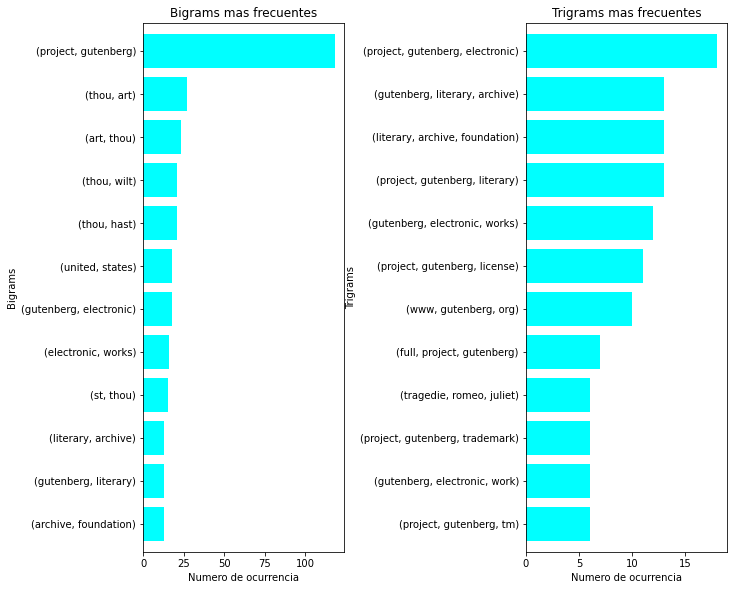

In [15]:
plt.figure(1)
plt.subplot(1,2,1)
bigrams_series_barh.sort_values().plot.barh(color = 'cyan', 
                                            width = 0.8, figsize = (10,8))
plt.title('Bigrams mas frecuentes')
plt.ylabel('Bigrams')
plt.xlabel('Numero de ocurrencia')

plt.subplot(1,2,2)
trigrams_series_barh.sort_values().plot.barh(color = 'cyan', 
                                            width = 0.8, figsize = (10,8))
plt.title('Trigrams mas frecuentes')
plt.ylabel('Trigrams')
plt.xlabel('Numero de ocurrencia')
plt.tight_layout(0.02)

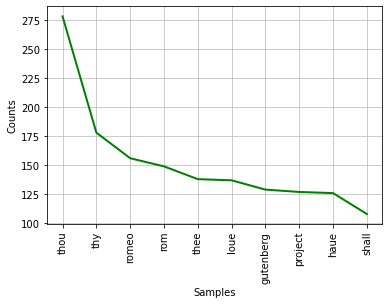

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
plt.figure(2)
frecuencia = nltk.FreqDist(filtered_tokens)
frecuencia.plot(10, color = 'g')

A modo general se realiza una funcion que me realice toodo lo realizado anteriormente

In [17]:
def plot_word_freq(url):
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, 'html5lib')
    text = soup.get_text()
    tokenizer = RegexpTokenizer('[A-Z a-z]\w+')
    tokens = tokenizer.tokenize(text)
    sw = nltk.corpus.stopwords.words('english')
    words = [ t.strip().lower() for t in tokens ]
    words_ns = [ word for word in words if word not in sw ]
    
    plt.figure(3)
    freq2 = nltk.FreqDist(words_ns)
    freq2.plot(50)
    return words, words_ns

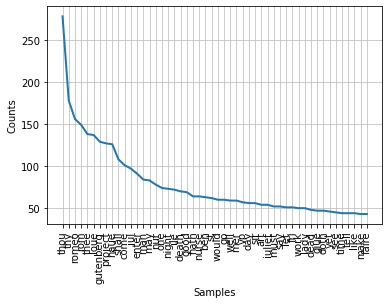

In [18]:
words, words_ns =plot_word_freq(url)

In [19]:
print(words[:10])

['xhtml_center', 'justify', 'content', 'center', 'display', 'flex', 'the', 'project', 'gutenberg', 'ebook']


In [20]:
print(words_ns[:10])

['xhtml_center', 'justify', 'content', 'center', 'display', 'flex', 'project', 'gutenberg', 'ebook', 'romeo']
